In [155]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
def add_ones(X):
    return np.insert(X, 0, 1, axis=1)

def make_weights(n_inputs, n_hiddens, n_outputs):
    
    Ws=[]
    if len(n_hiddens)==0:
        Ws= []
    else:
        for i in range(len(n_hiddens)):

            if i==0:
                v = np.random.uniform(-1, 1, size=(n_inputs+1, n_hiddens[i])) / np.sqrt(n_inputs + 1)
                Ws.append(v)

            else:
                v = np.random.uniform(-1, 1, size=(n_hiddens[i-1]+1, n_hiddens[i])) / np.sqrt(n_hiddens[i-1] + 1)
                Ws.append(v)
        w = np.random.uniform(-1, 1, size=(n_hiddens[-1]+1, n_outputs)) / np.sqrt(n_hiddens[-1] + 1)
        Ws.append(w)

    return Ws
def forward(Xst,Ws):
    layerop=[]
    for i in range(len(Ws)-1):
        if i==0:
            T = np.tanh(add_ones(Xst)@Ws[i])
            layerop.append(T)
        else:
            T=np.tanh(add_ones(T)@Ws[i])
            layerop.append(T)
    T=add_ones(T)@Ws[-1]
    layerop.append(T)
    #print(layerop[0].shape)
    return layerop

def backward(Xst,Tst,Ws):
    
    n_samples = Xst.shape[0]
    n_outputs = Tst.shape[1]
    Y = forward(Xst,Ws)
    list1 = []
    delta = -(Tst - Y[-1]) /  (n_samples * n_outputs)
    gradient_W = add_ones(Y[-2]).T @ delta
    list1.append(gradient_W)
   # print("d",delta.shape)
    #print("g",gradient_W.shape)
    
    for i in reversed(range(len(Ws)-1)):
        if i==0:
            delta = (delta @ Ws[i+1][1:, :].T)*(1 - Y[i] ** 2) 
            gradient_V = add_ones(Xst).T @ delta
            list1.append(gradient_V)
        else:
            #print(delta)
            delta=(delta @ Ws[i+1][1:, :].T) * (1 - Y[i] ** 2)
            gradient_V = add_ones(Y[i-1]).T @ delta
           # print("d",delta.shape)
           # print("g",gradient_V.shape)
            list1.append(gradient_V)
    list2 = list1[::-1]
    return list2

def train_sgd(X, T, Ws,learning_rate,n_epochs):
    
    stand_parms = calc_standardize_parameters(X, T)
    Xst = standardize_X(X, stand_parms)
    Tst = standardize_T(T, stand_parms)
    error_trace = []
    for epoch in range(n_epochs):
        gradient= backward(Xst, Tst, Ws)
        for i in (range(len(gradient))):
            Ws[i]-=learning_rate*gradient[i]
        Yst = forward(Xst, Ws)
        #print(Yst)
        Y = unstandardize_T(Yst[-1], stand_parms)
        error_trace.append(rmse(Y, T))

    return  Ws, stand_parms, error_trace

def use(X,Ws, stand_parms):
    # Standardize inputs X
    Xst = standardize_X(X, stand_parms)
    # Calculate outputs of each layer.
    Y = forward(Xst,Ws)
    Y[-1]=unstandardize_T(Y[-1], stand_parms)
    # Unstandardize output of output layer
    return Y
    
def rmse(Y, T):
    error = T - Y
    return np.sqrt(np.mean(error ** 2))    



In [21]:
def calc_standardize_parameters(X, T):
    Xmeans = X.mean(axis=0)
    Xstds = X.std(axis=0)
    Tmeans = T.mean(axis=0)
    Tstds = T.std(axis=0)
    return {'Xmeans': Xmeans, 'Xstds': Xstds,
            'Tmeans': Tmeans, 'Tstds': Tstds}

def standardize_X(X, stand_parms):
    return (X - stand_parms['Xmeans']) / stand_parms['Xstds']


def unstandardize_X(Xst, stand_parms):
    return Xst * stand_parms['Xstds'] + stand_parms['Xmeans']


def standardize_T(T, stand_parms):
    return (T - stand_parms['Tmeans']) / stand_parms['Tstds']


def unstandardize_T(Tst, stand_parms):
    return Tst * stand_parms['Tstds'] + stand_parms['Tmeans']

In [22]:
n_samples = 30

Xtrain = np.linspace(0., 20.0, n_samples).reshape((n_samples, 1))
Ttrain = 0.2 + 0.05 * (Xtrain) + 0.4 * np.sin(Xtrain / 2) + 0.2 * np.random.normal(size=(n_samples, 1))

Xtest = Xtrain + 0.1 * np.random.normal(size=(n_samples, 1))
Ttest = 0.2 + 0.05 * (Xtest) + 0.4 * np.sin(Xtest / 2) + 0.2 * np.random.normal(size=(n_samples, 1))

# Experiment-1

In [23]:
n_inputs = Xtrain.shape[1]
n_hiddens = [10,20]
n_outputs = Ttrain.shape[1]
n_epochs = 2000
learning_rate = 0.1
Ws = make_weights(n_inputs, n_hiddens, n_outputs)


Ws, stand_parms, error_trace = train_sgd(Xtrain, Ttrain,Ws, learning_rate, n_epochs)

Ytrain = use(Xtrain, Ws, stand_parms)  
rmse_train = rmse(Ytrain[-1], Ttrain)
Ytest = use(Xtest, Ws, stand_parms)
rmse_test = rmse(Ytest[-1], Ttest)

print(f'RMSE: Train {rmse_train:.2f} Test {rmse_test:.2f}')

RMSE: Train 0.18 Test 0.19


Text(0, 0.5, 'Hidden Unit Outputs2')

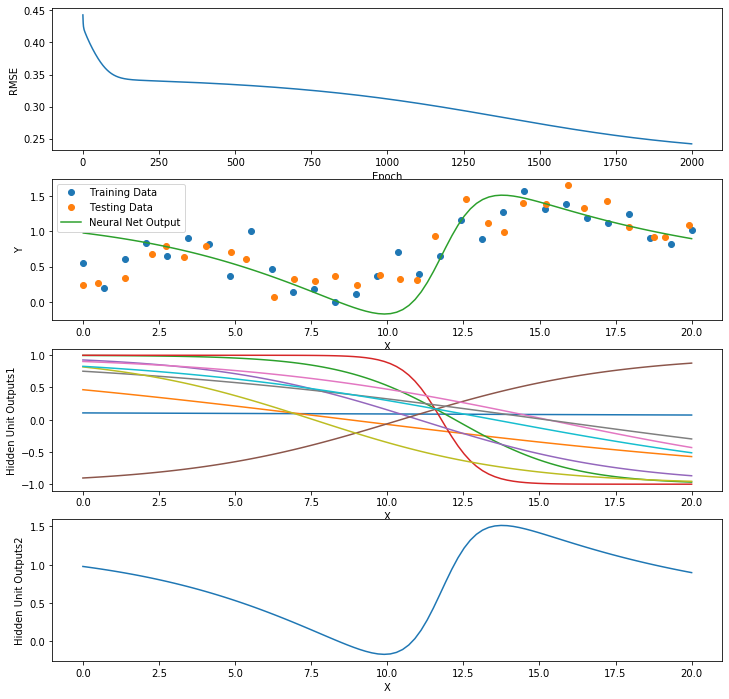

In [67]:
plt.figure(figsize=(12, 12))
plt.subplot(4, 1, 1)
plt.plot(error_trace)
plt.xlabel('Epoch')
plt.ylabel('RMSE')

plt.subplot(4, 1, 2)
plt.plot(Xtrain, Ttrain, 'o', label='Training Data')
plt.plot(Xtest, Ttest, 'o', label='Testing Data')
X_for_plot = np.linspace(0, 20, 100).reshape(-1, 1)
Y_train = use(X_for_plot, Ws, stand_parms)
plt.plot(X_for_plot, Y_train[-1], label='Neural Net Output')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')



plt.subplot(4, 1, 3)
plt.plot(X_for_plot, Y_train[-2])
plt.xlabel('X')
plt.ylabel('Hidden Unit Outputs1')
plt.subplot(4, 1, 4)
plt.plot(X_for_plot, Y_train[-1])
plt.xlabel('X')
plt.ylabel('Hidden Unit Outputs2')

Test your functions on the same one-dimensional data shown above. Try your code using two hidden layers of as many units in each layer as you wish. Plot the results, including an additional plot to show the outputs of each of the two hidden layers.

Write a for loop to create and train neural nets containing one, two, three and four hidden layers each with 4 hidden units. Train each for 10,000 epochs and a learning rate of 0.1. Collect list of results with each result being a list containing the number of layers and the RMSE for training and testing data.

Print a pretty table of your results be creating a pandas DataFrame of the results list (of lists). Discuss the results.

# Experiment-2 

In [71]:
hiddens_list=[[4],[4,4,],[4,4,4],[4,4,4,4]]
n_epochs = 10000
learning_rate = 0.1

In [88]:
Ws=[]
rmse_trainlist=[]
rmse_testlist=[]
for i in range(len(hiddens_list)):
    Wt = make_weights(n_inputs, hiddens_list[i], n_outputs)
    Ws, stand_parms, error_trace = train_sgd(Xtrain, Ttrain,Wt, learning_rate, n_epochs)
    Ytrain = use(Xtrain, Ws, stand_parms)  
    rmse_train = rmse(Ytrain[-1], Ttrain)
    rmse_trainlist.append(rmse_train)
    Ytest = use(Xtest, Ws, stand_parms)
    rmse_test = rmse(Ytest[-1], Ttest)
    rmse_testlist.append(rmse_test)
    
for i in range(len(hiddens_list)):
    print(f'RMSE: Train {rmse_trainlist[i]:.2f} Test {rmse_testlist[i]:.2f}')

RMSE: Train 0.17 Test 0.19
RMSE: Train 0.17 Test 0.19
RMSE: Train 0.16 Test 0.23
RMSE: Train 0.16 Test 0.22


In [89]:
results=[]
for i in range(len(hiddens_list)):
    results.append([i+1 , rmse_trainlist[i], rmse_testlist[i]])
    

In [90]:
results

[[1, 0.16794361667403357, 0.18940158084523956],
 [2, 0.16981896196789614, 0.18902372341321608],
 [3, 0.1647001934378426, 0.22595358683694902],
 [4, 0.1621681134784794, 0.21999579412442805]]

In [91]:
import pandas
df = pandas.DataFrame(results, columns=('Layers', 'RMSE Train', 'RMSE Test'))
df

,Layers,RMSE Train,RMSE Test
0,1,0.167944,0.189402
1,2,0.169819,0.189024
2,3,0.164700,0.225954
3,4,0.162168,0.219996


# PART-2

In [25]:
def sig(s):
    return 1 / (1 + np.exp(-s))

def dfsig(f_value):
    return f_value * (1 - f_value)


In [26]:
def forward_asig(Xst,Ws):
    layerop=[]
    for i in range(len(Ws)-1):
        if i==0:
            T = sig(add_ones(Xst)@Ws[i])
            layerop.append(T)
        else:
            T=sig(add_ones(T)@Ws[i])
            layerop.append(T)
    T=add_ones(T)@Ws[-1]
    layerop.append(T)
    return layerop

def backward_asig(Xst,Tst,Ws):
    
    n_samples = Xst.shape[0]
    n_outputs = Tst.shape[1]
    Y = forward_asig(Xst,Ws)
    list1 = []
    delta = -(Tst - Y[-1]) /  (n_samples * n_outputs)
    gradient_W = add_ones(Y[-2]).T @ delta
    list1.append(gradient_W)
   # print("d",delta.shape)
    #print("g",gradient_W.shape)
    
    for i in reversed(range(len(Ws)-1)):
        if i==0:
            delta = (delta @ Ws[i+1][1:, :].T)*dfsig(Y[i])
            gradient_V = add_ones(Xst).T @ delta
            list1.append(gradient_V)
        else:
            #print(delta)
            delta=(delta @ Ws[i+1][1:, :].T) * dfsig(Y[i])
            gradient_V = add_ones(Y[i-1]).T @ delta
           # print("d",delta.shape)
           # print("g",gradient_V.shape)
            list1.append(gradient_V)
            
    list2 = list1[::-1]
    return list2

def train_sgd_asig(X, T, Ws,learning_rate,n_epochs):
    
    stand_parms = calc_standardize_parameters(X, T)
    Xst = standardize_X(X, stand_parms)
    Tst = standardize_T(T, stand_parms)
    error_trace = []
    for epoch in range(n_epochs):
        gradient= backward_asig(Xst, Tst, Ws)
       # print(len(gradient))
        for i in (range(len(gradient))):
            Ws[i]-=learning_rate*gradient[i]
        Yst = forward_asig(Xst, Ws)
       # print(Yst)
        Y = unstandardize_T(Yst[-1], stand_parms)
        error_trace.append(rmse(Y, T))

    return  Ws, stand_parms, error_trace

def use_asig(X,Ws, stand_parms):
    # Standardize inputs X
    Xst = standardize_X(X, stand_parms)
    # Calculate outputs of each layer.
    Y = forward_asig(Xst,Ws)
    Y[-1]=unstandardize_T(Y[-1], stand_parms)
    # Unstandardize output of output layer
    return Y
    

# Experiment-3

In [46]:
n_inputs = Xtrain.shape[1]
n_hiddens = [10]
n_outputs = Ttrain.shape[1]
n_epochs = 2000
learning_rate = 0.1
Ws = make_weights(n_inputs, n_hiddens, n_outputs)
#print(Ws)

Ws, stand_parms, error_trace = train_sgd_asig(Xtrain, Ttrain,Ws, learning_rate, n_epochs)

Ytrain = use_asig(Xtrain, Ws, stand_parms)  
rmse_train = rmse(Ytrain[-1], Ttrain)
Ytest = use_asig(Xtest, Ws, stand_parms)
rmse_test = rmse(Ytest[-2], Ttest)

print(f'RMSE: Train {rmse_train:.2f} Test {rmse_test:.2f}')

RMSE: Train 0.24 Test 0.62


Text(0, 0.5, 'Hidden Unit Outputs')

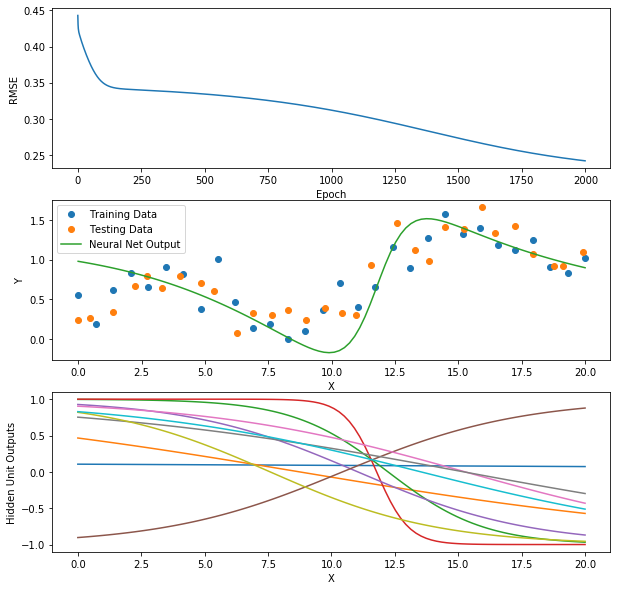

In [47]:
plt.figure(figsize=(10, 10))
plt.subplot(3, 1, 1)
plt.plot(error_trace)
plt.xlabel('Epoch')
plt.ylabel('RMSE')

plt.subplot(3, 1, 2)
plt.plot(Xtrain, Ttrain, 'o', label='Training Data')
plt.plot(Xtest, Ttest, 'o', label='Testing Data')
X_for_plot = np.linspace(0, 20, 100).reshape(-1, 1)
Y_train = use(X_for_plot, Ws, stand_parms)
plt.plot(X_for_plot, Y_train[-1], label='Neural Net Output')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')

plt.subplot(3, 1, 3)
plt.plot(X_for_plot, Y_train[-2])
plt.xlabel('X')
plt.ylabel('Hidden Unit Outputs')

# Experiment-4

In [147]:
n_inputs = Xtrain.shape[1]
n_hiddens = [2,2]
n_outputs = Ttrain.shape[1]
n_epochs = 8000
learning_rate = 0.1
Ws = make_weights(n_inputs, n_hiddens, n_outputs)
#print(Ws)

Ws, stand_parms, error_trace = train_sgd_asig(Xtrain, Ttrain,Ws, learning_rate, n_epochs)

Ytrain = use_asig(Xtrain, Ws, stand_parms)  
rmse_train = rmse(Ytrain[-1], Ttrain)
Ytest = use_asig(Xtest, Ws, stand_parms)
rmse_test = rmse(Ytest[-2], Ttest)

print(f'RMSE: Train {rmse_train:.2f} Test {rmse_test:.2f}')

RMSE: Train 0.26 Test 0.42


Text(0, 0.5, 'Hidden Unit2 Outputs')

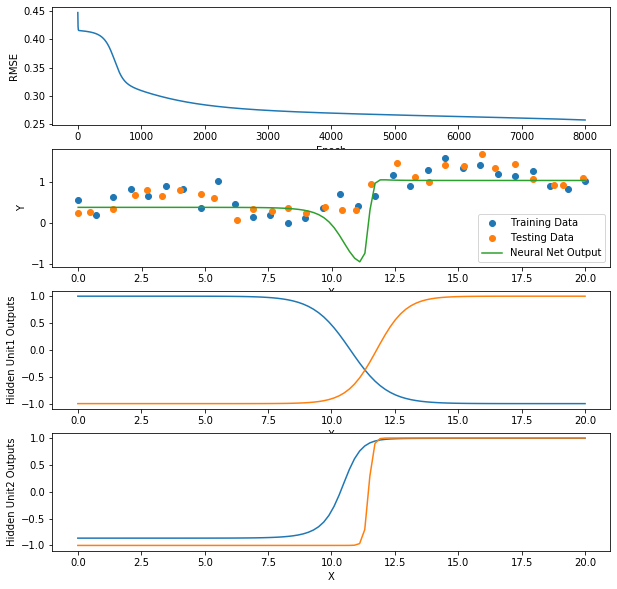

In [152]:
plt.figure(figsize=(10, 10))
plt.subplot(4, 1, 1)
plt.plot(error_trace)
plt.xlabel('Epoch')
plt.ylabel('RMSE')

plt.subplot(4, 1, 2)
plt.plot(Xtrain, Ttrain, 'o', label='Training Data')
plt.plot(Xtest, Ttest, 'o', label='Testing Data')
X_for_plot = np.linspace(0, 20, 100).reshape(-1, 1)
Y_train = use(X_for_plot, Ws, stand_parms)
plt.plot(X_for_plot, Y_train[-1], label='Neural Net Output')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')

plt.subplot(4, 1, 3)
plt.plot(X_for_plot, Y_train[-3])
plt.xlabel('X')
plt.ylabel('Hidden Unit1 Outputs')

plt.subplot(4, 1, 4)
plt.plot(X_for_plot, Y_train[-2])
plt.xlabel('X')
plt.ylabel('Hidden Unit2 Outputs')

# Experiment-5

Experiments with multiple layers using asymmetric sigmoid function

In [92]:
hiddens_list=[[4],[4,4,],[4,4,4],[4,4,4,4]]
n_epochs = 10000
learning_rate = 0.1

In [94]:
Ws=[]
rmse_trainlist=[]
rmse_testlist=[]
for i in range(len(hiddens_list)):
    Wt = make_weights(n_inputs, hiddens_list[i], n_outputs)
    Ws, stand_parms, error_trace = train_sgd_asig(Xtrain, Ttrain,Wt, learning_rate, n_epochs)
    Ytrain = use_asig(Xtrain, Ws, stand_parms)  
    rmse_train = rmse(Ytrain[-1], Ttrain)
    rmse_trainlist.append(rmse_train)
    Ytest = use_asig(Xtest, Ws, stand_parms)
    rmse_test = rmse(Ytest[-1], Ttest)
    rmse_testlist.append(rmse_test)
    
for i in range(len(hiddens_list)):
    print(f'RMSE: Train {rmse_trainlist[i]:.2f} Test {rmse_testlist[i]:.2f}')

RMSE: Train 0.21 Test 0.22
RMSE: Train 0.21 Test 0.22
RMSE: Train 0.26 Test 0.24
RMSE: Train 0.42 Test 0.44


In [95]:
results=[]
for i in range(len(hiddens_list)):
    results.append([i+1 , rmse_trainlist[i], rmse_testlist[i]])
    

In [96]:
results

[[1, 0.21299946149971646, 0.2159454997751949],
 [2, 0.21103270028341115, 0.21509258652503976],
 [3, 0.2620700855469468, 0.23853065849732444],
 [4, 0.41618631680639717, 0.44353107100391703]]

In [97]:
import pandas
df = pandas.DataFrame(results, columns=('Layers', 'RMSE Train', 'RMSE Test'))
df

,Layers,RMSE Train,RMSE Test
0,1,0.212999,0.215945
1,2,0.211033,0.215093
2,3,0.262070,0.238531
3,4,0.416186,0.443531


# Observations:

I have done 5 experiments , PART-1 ,first 2 tanh as an activation function and PART-2  ,next 3 are as asymmetric sigmoid as an activation function.

PART-1:

First experiment is to train a model with any number of hidden units and layers for satisfying the single dimensional data.
parameters : n_epochs = 2000 ,learning_rate = 0.1 , n_hiddens = [10, 20] ,n_samples = 30 .
RMSE: Train 0.18 , Test 0.19 . 
The model  fits perfectly for the data from the plotting and  train rmse starting at 0.45 decreases to 0.18 after repetitve trainng . Testing RMSE is 0.19 which indicates the model well behaving for the test data.

Second Experiment is to train neural nets containing one, two, three and four hidden layers each with 4 hidden units. epochs=10,000 ,learning rate = 0.1.  I have created a pandas data frame to observe the values of Train and Test RMSE values for different hidden layer configurations. The training RMSE for all the four experiments with different hidden layers are in the range 0.16 to 0.17 with network and  4 hidden layers is having best RMSE training value among all.But surprisingly , Test rmse is less among all  for network with more than two hidden layers indicating it is not better in fitting the new data to the model. There is no advantage in increasing the number of hiddenlayers which indicating that optimised network among all the four is with two hidden layers in terms of testing the new data. since network with 1 hidden layer is also having less test rmse so less number of layers is a good preference for this kind of data.


PART-2:

Third Experiment is using asyymetric sigmoid function on the same data with parameters :
n_epochs = 2000 ,learning_rate = 0.1, n_hiddens = [10], n_samples = 30. 
RMSE: Train 0.24 Test 0.62
From the plotting graph the model is a good fit for the data and it is adopting the shape depending on the magnitude of the data values. Also training performed well on the data but test RMSE is high indicating that the neural network even though well trained it is not functioning as good as the model with tanh  activation function for new data.

Fourth Experiment is to train a model with any number of hidden units and layers for satisfying the single dimensional data for sigmoid activation function.
parameters : n_epochs = 2000 ,learning_rate = 0.1 , n_hiddens = [10, 20] ,n_samples = 30 .
RMSE: Train 0.26 Test 0.42
The training RMSE is less and increased number of hidden layers decreases the test RMSE to 0.42 which is better compared to previous experiment with single hidden layer. the model fits well for the given data but by observing the data the transition position at which data points are shifting to higher value than the previous value the model steeps down and then it adjusted to the data.Model behave almost linear in some regions and form the weights graph there is no change in the weights value in most of the regions but the transition is happended in the weights at particular region only at some range in both the outputs of the hidden layers.

Fifth Experiment is to train a train neural nets containing one, two, three and four hidden layers each with 4 hidden units. 
epochs=10,000 ,learning rate = 0.1 using asymmetric sigmoid function.I have created a pandas data frame to observe the values of Train and Test RMSE values for different hidden layer configurations.The surpsrising results are with increase in number of layers the model is not working good and with 1 and 2 hidden layers it is best both in terms of RMSE train and test values.The most optimised network is with two hidden layers and 4 units each and RMSE is 0.21 both train and test data. 


Similarities: 

Both the functions are behaving well for smaller number of hiddens and hidden layers. the relative difference in train and test RMSE  is also close to each other for both the activation functions. since the maximum value for both the functions  is 1 , the outputs of the hidden layers is within the range of 1 for the both networks . 

Differences:

The sigmoid function weights doesnt have negative values range and also it is not symmetric as tanh which provides range over [-1 1]. If there is a huge change the values from one range to another range as of 4th experiment the inflexion can be very high for sigmoid and it is not properly fitted to the model as that of tanh. Even we can observe this difference in the weights of the hidden layers plot.If we try network with different hidden layers configuration, The RMSE for testing is very high for sigmoid and it is not well behaving for this data even though training  RMSE is good.

Conclusion:

From the above experiments we can conclude that tanh is better activation function than asymmetric sigmoid with Train and test RMSE in range of 0.16 to 0.18. Even though with increase in number of layers in tanh model it is behaving good unlike sigmoid
function when the layers are getting high it is behaving worse.Because of the range of tanh from [-1 to 1] and sigmoid only have from [0,1] negative values are strongly mapped in tanh function compared to sigmoid function.Even if we calculate a gradient in the range of [-1,1 ] for tanh  functions it is in [0.42,1] whereas for sigmoid function the derivative range is [0.20 ,0.25] only.  which implies that tanh provides stronger gradients than sigmoid function.





In [153]:
%run -i A2grader.py


======================= Code Execution =======================

Extracting python code from notebook named 'testingnn-A2.ipynb' and storing in notebookcode.py
Removing all statements that are not function or class defs or import statements.

## Testing ####################################################################

    X = np.arange(4).reshape(-1, 1) + 5
    T = np.array([1, 2, -3, -4]).reshape((-1, 1))
    Ws = make_weights(1, [3, 4], 1)
    for W in Ws:
        W[:] = np.linspace(-1, 1, W.size).reshape(W.shape)

    stand_parms = {'Xmeans': np.array([[0]]), 'Xstds': np.array([[1]]),
                   'Tmeans': np.array([[0]]), 'Tstds': np.array([[1]])}

    def print_layers(what, lst):
        print(f'{what}:')
        for (i, element) in enumerate(lst):
            print(f' Layer {i}:')
            print(f' {element}')

    print('X is')
    print(X)
    print_layers('Ws', Ws)
    print('stand_parms is')
    print(stand_parms)
    Ys = use(X, Ws, stand_parms)

X is
 [[5]
 [6

# Extra Credit 

I have implemented the " Concrete Compressive Strength Data Set " , http://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength From the UCI machine learning repository to predict the concrete compressive strength from the given data set. There are total 9 attributes (columns) in the dataset and we need to predict the last column using remaining 8 attributes as inputs.so Target is the final column and Input is the remaining 8 columns in the data set.Using our model and tanh as activation function we need to fit the data to the model.I have loaded the excel file into the pandas data frame as below.



In [156]:
data1 = pd.read_excel('Concrete_Data.xlsx')
data1

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [157]:
names=data1.columns
names=names.values

In [158]:
Xnames=names[:-1]
Tname=names[-1]
Xnames,Tname

(array(['Cement (component 1)(kg in a m^3 mixture)',
        'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
        'Fly Ash (component 3)(kg in a m^3 mixture)',
        'Water  (component 4)(kg in a m^3 mixture)',
        'Superplasticizer (component 5)(kg in a m^3 mixture)',
        'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
        'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)'],
       dtype=object),
 'Concrete compressive strength(MPa, megapascals) ')

In [159]:
data2,data3=data1.iloc[:,:-1],data1.iloc[:,-1:]

In [160]:
data2

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [161]:
Xtrain=data2.values
Ttrain=data3.values

In [162]:
n_inputs = Xtrain.shape[1]
n_hiddens = [20,10]
n_outputs = Ttrain.shape[1]
n_epochs = 1000
learning_rate = 0.1
Ws = make_weights(n_inputs, n_hiddens, n_outputs)
Ws, stand_parms, error_trace = train_sgd(Xtrain, Ttrain,Ws, learning_rate, n_epochs)

Ytrain = use(Xtrain, Ws, stand_parms)  
rmse_train = rmse(Ytrain[-1], Ttrain)

print(f'RMSE: Train {rmse_train:.2f} ')

RMSE: Train 5.87 


Text(0, 0.5, 'RMSE')

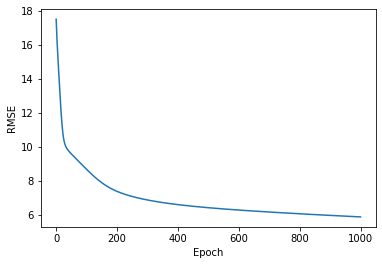

In [163]:
plt.plot(error_trace)
plt.xlabel('Epoch')
plt.ylabel('RMSE')


# ExtraCredit-Observation

Using the train_sgd network and parameters : n_epochs = 1000 , n_hiddens = [20,10], learning_rate = 0.1.
the RMSE value is 5.87 , But from the graph the slope curve of  RMSE value near 1000 epochs is not flattened, so we can still reduce the RMSE value by changing the parameters. By repetitve experiments changing of the parameters is not giving significant decrease in the RMSE.so i have plotted all the attributes data and Target data below to see which attribute is not providing useful features to the model.so by plotting as below shown we can observe that "Coarse aggregate component" column is having high values from other attributes and from plotting its behaviour is also showing no correlation with target values, so we can remove that attribute and again train the model with one less attribute. This provided a good training of the model and RMSE with different parameters it reached to a minimum value of 3.51.Best Parameters:n_hiddens = [10,10] , n_epochs = 50000
learning_rate = 0.1. I have changed the learning rate since for other values there is a spike in the RMSE and this learning rate,epochs and hidden layer network is providing gradual decrease in the slope. I have plotted the Target and final layer output values from the USE function in the below graph. since most of the data points are overlapping and unable to differentiate the target and predicted i have decreased its intensity to alpha=0.5 and made a dotted line for the model.The total number of samples are 1030 , so i have printed the first 50 values of target and predicted just to have more visibilty of the data and we can compare from the table. Also from the graph we can observe that model is initially having difference in predicted and Target but after that it tries to fit to the model as good as possible. 

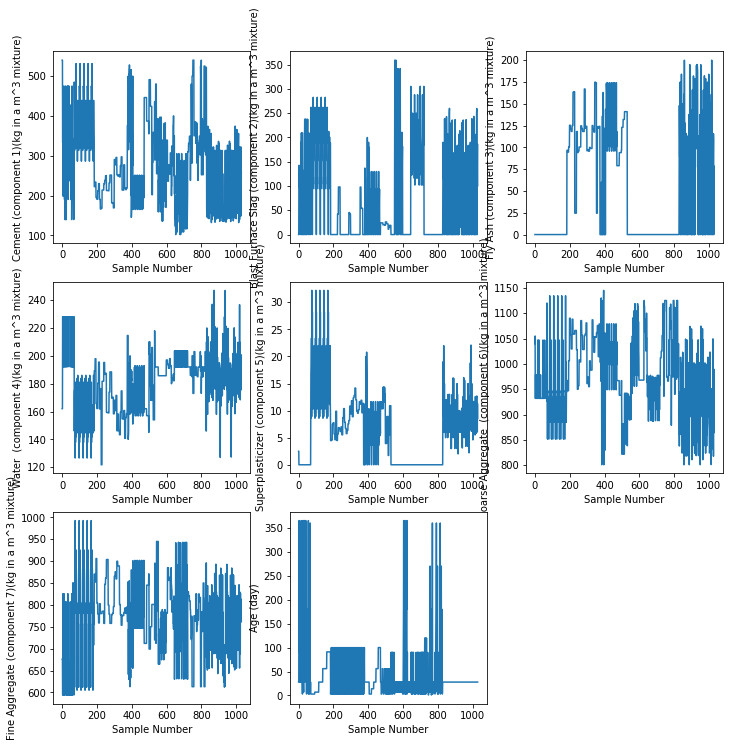

In [164]:
plt.figure(figsize=(12, 12))
nrow, ncol = Xtrain.shape
for c in range(ncol):
    plt.subplot(3, 3, c+1)
    plt.plot(Xtrain[:, c])
    plt.xlabel('Sample Number')
    plt.ylabel(names[c])

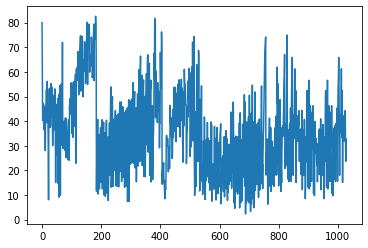

In [165]:
plt.plot(Ttrain)

In [166]:
data2=data2.iloc[:,data2.columns!='Coarse Aggregate  (component 6)(kg in a m^3 mixture)']

In [167]:
data2

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,540.0,0.0,0.0,162.0,2.5,676.0,28
1,540.0,0.0,0.0,162.0,2.5,676.0,28
2,332.5,142.5,0.0,228.0,0.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,825.5,360
...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,788.9,28


In [168]:
data3

,"Concrete compressive strength(MPa, megapascals)"
0,79.986111
1,61.887366
2,40.269535
3,41.052780
4,44.296075
...,...
1025,44.284354
1026,31.178794
1027,23.696601
1028,32.768036


In [169]:
Xtrain=data2.values
Ttrain=data3.values

In [170]:
n_inputs = Xtrain.shape[1]
n_hiddens = [10,10]
n_outputs = Ttrain.shape[1]
n_epochs = 10000
learning_rate = 0.4
Ws = make_weights(n_inputs, n_hiddens, n_outputs)
Ws, stand_parms, error_trace = train_sgd(Xtrain, Ttrain,Ws, learning_rate, n_epochs)

Ytrain = use(Xtrain, Ws, stand_parms)  
rmse_train = rmse(Ytrain[-1], Ttrain)

print(f'RMSE: Train {rmse_train:.2f} ')

RMSE: Train 4.26 


Text(0, 0.5, 'RMSE')

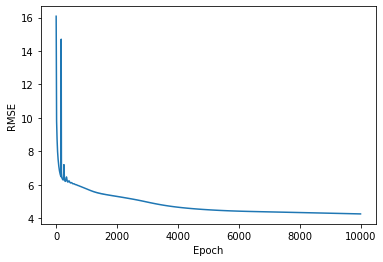

In [171]:
plt.plot(error_trace)
plt.xlabel('Epoch')
plt.ylabel('RMSE')


In [172]:
n_inputs = Xtrain.shape[1]
n_hiddens = [10,10]
n_outputs = Ttrain.shape[1]
n_epochs = 20000
learning_rate = 0.2
Ws = make_weights(n_inputs, n_hiddens, n_outputs)
Ws, stand_parms, error_trace = train_sgd(Xtrain, Ttrain,Ws, learning_rate, n_epochs)

Ytrain = use(Xtrain, Ws, stand_parms)  
rmse_train = rmse(Ytrain[-1], Ttrain)

print(f'RMSE: Train {rmse_train:.2f} ')

RMSE: Train 4.03 


Text(0, 0.5, 'RMSE')

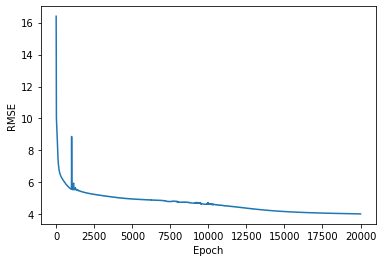

In [173]:
plt.plot(error_trace)
plt.xlabel('Epoch')
plt.ylabel('RMSE')


In [181]:
n_inputs = Xtrain.shape[1]
n_hiddens = [10,10]
n_outputs = Ttrain.shape[1]
n_epochs = 50000
learning_rate = 0.1
Ws = make_weights(n_inputs, n_hiddens, n_outputs)
Ws, stand_parms, error_trace = train_sgd(Xtrain, Ttrain,Ws, learning_rate, n_epochs)

Ytrain = use(Xtrain, Ws, stand_parms)  
rmse_train = rmse(Ytrain[-1], Ttrain)

print(f'RMSE: Train {rmse_train:.2f} ')

RMSE: Train 3.51 


Text(0, 0.5, 'RMSE')

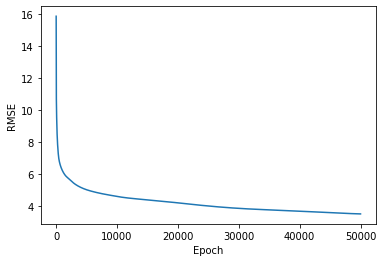

In [182]:
plt.plot(error_trace)
plt.xlabel('Epoch')
plt.ylabel('RMSE')


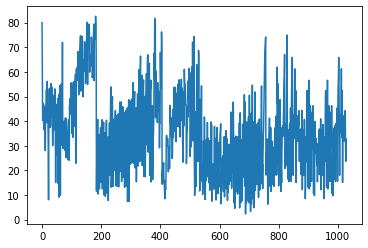

In [183]:
plt.plot(Ttrain )

Text(0, 0.5, 'Y')

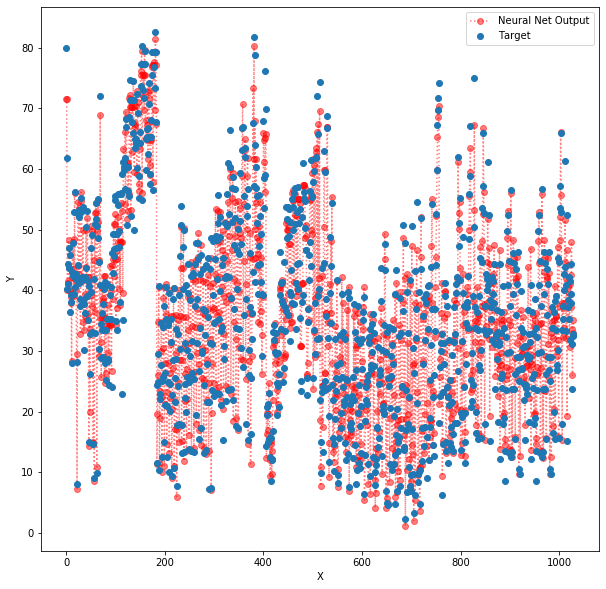

In [184]:
plt.figure(figsize=(10, 10))
Y_train = use(Xtrain, Ws, stand_parms)
plt.plot(Y_train[-1],  "ro:",alpha=0.5,label='Neural Net Output')
plt.plot(Ttrain, "o",label="Target")
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')

In [185]:
Predicted=Y_train[-1][:50]
Target=Ttrain[:50]

In [186]:
Target
dataframe = pd.DataFrame({'Y':list(Predicted), 'T':list(Target)})

In [187]:
dataframe

,Y,T
0,[71.56974070055954],[79.98611076]
1,[71.56974070055954],[61.887365759999994]
2,[40.113334268727215],[40.269535256000005]
3,[41.58038140395881],[41.052779992]
4,[41.21776735023832],[44.296075096]
5,[48.22939042053931],[47.029847436000004]
6,[43.717370403814236],[43.698299404]
7,[39.93479962593279],[36.447769788]
8,[40.14549754045708],[45.854290856]
9,[37.90231531261162],[39.28978986]
